# Wine Characteristics



### Challenge

The data set presents characteristcs of wines, and the goal is to classify them in 3 different groups

Wee will use K-Means Clustering for such job

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# EDA

In [3]:
# Loading dataset

df = pd.read_csv('caracteristicas de vinos.csv')

In [5]:
# Checking for nulls

df.isnull().sum()

Vino               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
df

# 1st column is cathegorical (number of each wine)

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,174,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,175,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,176,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,177,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
# Feature scaling is needed by looking at the std and mean of each feature

df.describe()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,89.500000,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,51.528309,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,45.250000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,89.500000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,133.750000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,178.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Preprocessing

In [10]:
# Splitting data

X = df.drop(['Vino'], axis = 1)   # apply feature scaling
y = pd.DataFrame(df['Vino'])      

In [11]:
# Feature Scaling :: STANDARDIZATION 

sc_x = StandardScaler()
X_scaled = pd.DataFrame(sc_x.fit_transform(X)) # transforming to DataFrame

X_scaled.columns = X.columns.values
X_scaled.index = X.index.values

# Model
- Elbow method
- Training: K-means clustering
- Visualization

- Elbow method:

WCSS => is defined as the sum of the squared distance between each member of the cluster and its centroid

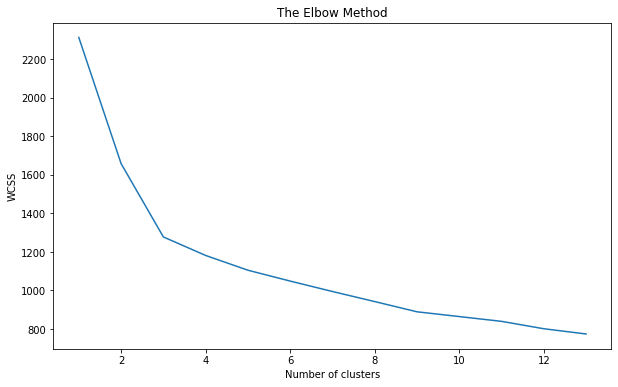

In [15]:
# According to the Elbow Method, the best number of clusters are 3

wcss = [] # Within Cluster Sum of Squares (WCSS). 

for i in range(1, (len(X_scaled.columns) + 1)):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10,6))
plt.plot(range(1, len(X_scaled.columns) + 1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- Training the K-Means model

In [16]:
clustering = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300)
clustering.fit(X_scaled)   

KMeans(n_clusters=3)

In [18]:
# adding a column to the dataframe with each cluster number

df['Kmeans_clusters'] = clustering.labels_ 

- PCA (Principal Component Analysis) - Dimensionality Reduction

In [19]:
pca = PCA(n_components = 2)

pca_array = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data = pca_array, columns = ['Component_1', 'Component_2'])
pca_df = pd.concat([pca_df, df['Kmeans_clusters']], axis = 1)

pca_df.describe()

,Component_1,Component_2,Kmeans_clusters
count,1.780000e+02,1.780000e+02,178.000000
mean,-9.730044e-17,-1.546828e-16,1.078652
std,2.175417e+00,1.584639e+00,0.805696
min,-4.280639e+00,-3.515090e+00,0.000000
25%,-2.172762e+00,-1.233675e+00,0.000000
50%,6.051146e-02,-2.620302e-01,1.000000
75%,2.001293e+00,1.398300e+00,2.000000
max,4.312784e+00,3.871784e+00,2.000000


- Visualising the clusters

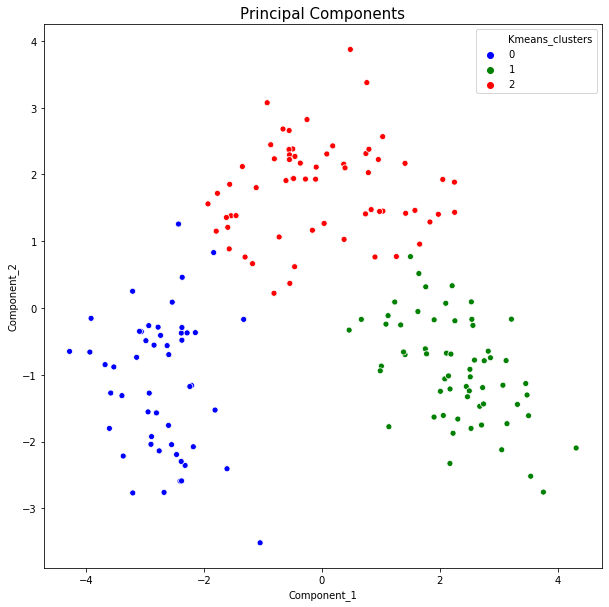

In [26]:
fig = plt.figure(figsize = (10, 10))
plt.title('Principal Components', fontsize = 15)

col = ['b', 'g', 'r']
ax = sb.scatterplot(x = 'Component_1', y = 'Component_2',
                    data = pca_df,
                    palette = col,
                    hue = 'Kmeans_clusters')

### Saving the dataset with the clusters

In [27]:
df.to_csv('Vinos with their clusters_results.csv')